<a href="https://colab.research.google.com/github/ANAGHA-SREYAS/Linear_regression_ML/blob/main/House_rent_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('/content/House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
#descriptive summary
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
#checking for null values
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

rent of the houses in different cities according to the number of bedrooms, halls, and kitchens

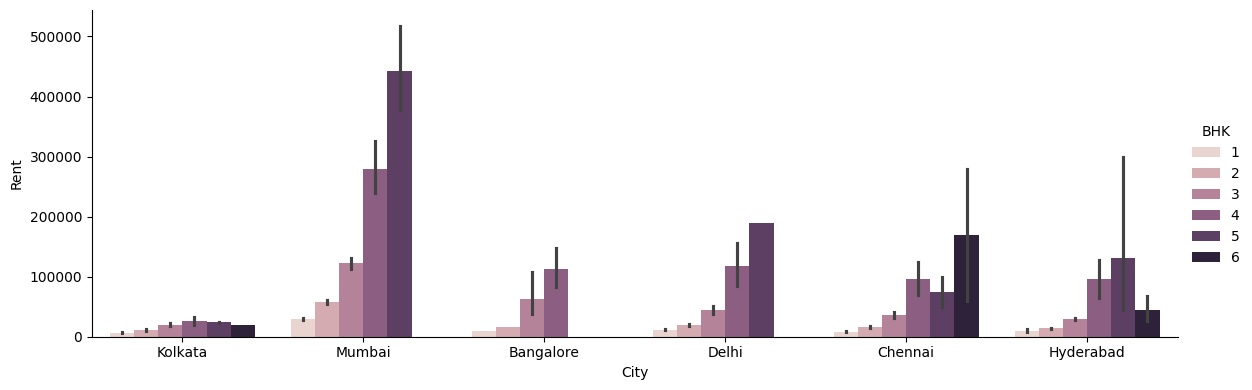

In [9]:
g = sns.catplot(
    data=data,
    x='City',
    y='Rent',
    hue='BHK',kind='bar',
    height=4,
    aspect=3)


plt.show()

 rent of the houses in different cities according to the area type

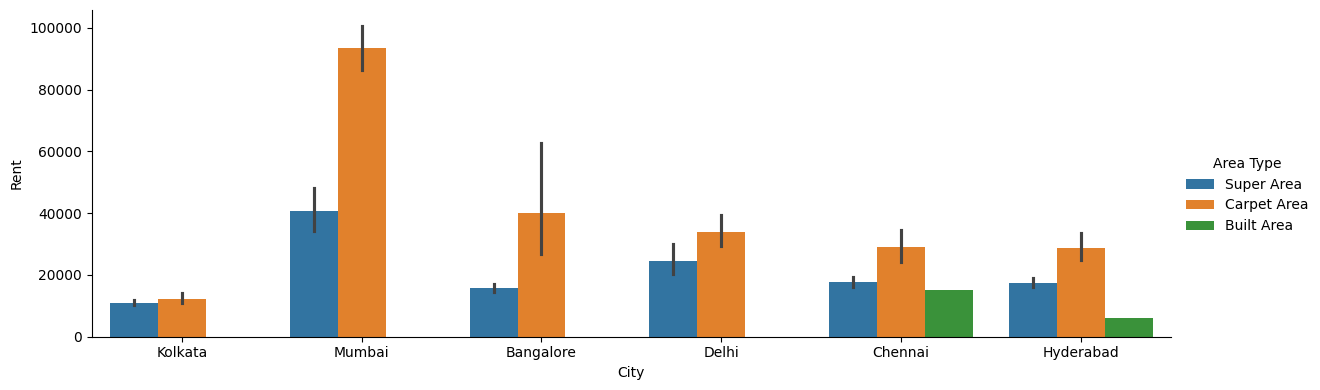

In [11]:
sns.catplot(data=data,x='City',y='Rent',hue='Area Type',kind='bar',height=4,aspect=3)
plt.show()

rent of the houses in different cities according to the furnishing status of the house

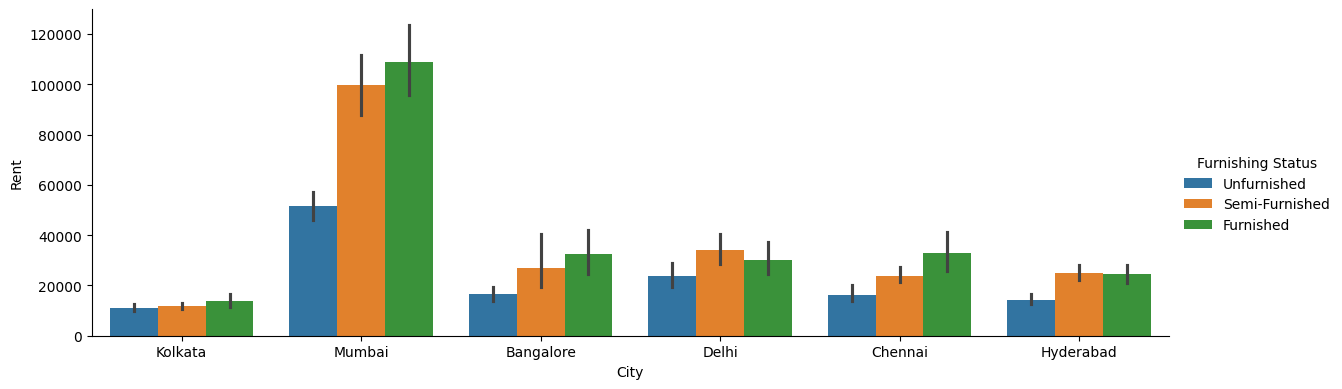

In [12]:
sns.catplot(data=data,x='City',y='Rent',hue='Furnishing Status',kind='bar',height=4,aspect=3)
plt.show()

 rent of the houses in different cities according to the size of the house

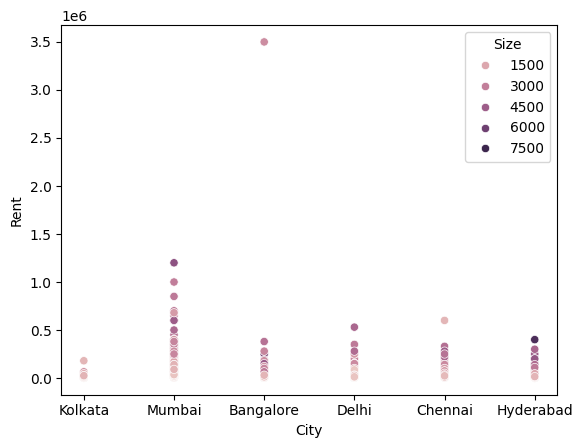

In [19]:
sns.scatterplot(data=data,x='City',y='Rent',hue='Size')
plt.show()

 the number of houses available for rent in different cities according to the dataset

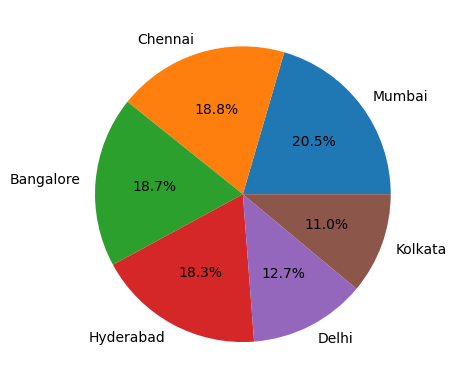

In [21]:
cities_count=data['City'].value_counts()
plt.pie(cities_count,labels=cities_count.index,autopct='%1.1f%%')
plt.show()

In [25]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Build a model and evaluate it

In [26]:
#data prerprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Area Type']=le.fit_transform(data['Area Type'])
data['City']=le.fit_transform(data['City'])
data['Furnishing Status']=le.fit_transform(data['Furnishing Status'])
data['Tenant Preferred']=le.fit_transform(data['Tenant Preferred'])
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,2,Bandel,4,2,1,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,2,"Phool Bagan, Kankurgachi",4,1,1,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,2,Salt Lake City Sector 2,4,1,1,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,2,Dumdum Park,4,2,1,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,1,South Dum Dum,4,2,0,1,Contact Owner


assigning values to x and y

In [28]:
x=np.array(data[["BHK", "Size", "Area Type", "City", "Furnishing Status", "Tenant Preferred", "Bathroom"]])
y=np.array(data[['Rent']])


splitting of data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


Building a model and evaluate it

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=21)

Epoch 1/21
3796/3796 [==============================] - 50s 12ms/step - loss: 3964039680.0000
Epoch 2/21
3796/3796 [==============================] - 45s 12ms/step - loss: 3394859008.0000
Epoch 3/21
3796/3796 [==============================] - 51s 13ms/step - loss: 3519020032.0000
Epoch 4/21
3796/3796 [==============================] - 46s 12ms/step - loss: 2813933312.0000
Epoch 5/21
3796/3796 [==============================] - 46s 12ms/step - loss: 2551977728.0000
Epoch 6/21
3796/3796 [==============================] - 46s 12ms/step - loss: 2331166720.0000
Epoch 7/21
3796/3796 [==============================] - 46s 12ms/step - loss: 2146030720.0000
Epoch 8/21
3796/3796 [==============================] - 49s 13ms/step - loss: 1998166144.0000
Epoch 9/21
3796/3796 [==============================] - 48s 13ms/step - loss: 1892258304.0000
Epoch 10/21
3796/3796 [==============================] - 48s 13ms/step - loss: 1795410048.0000
Epoch 11/21
3796/3796 [==============================] - 49


 predict the rent of a housing property using the trained model

In [34]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
features = np.array([[a, b, c, d, e, f, g]])
print("Predicted House Price = ", model.predict(features))

Enter House Details to Predict Rent
Number of BHK: 2
Size of the House: 1234
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 1
Pin Code of the City: 123
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 3
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 2
Number of bathrooms: 2
1/1 [==============================] - 1s 945ms/step
Predicted House Price =  [[4202.4043]]
